In [1]:
# First import the relevant packages
import numpy as np
from qiskit import *
import matplotlib.pyplot as plt
from qiskit.extensions import * #UnitaryGate here
from qiskit.extensions import Initialize

## The Qubit

Straightforward use of a quantum circuit with one qubit. The Hamiltonian is taken to be $\text{H} = \omega \sigma_z/2$, where $\sigma_z$ is the z-Pauli operator. We measure in the basis spanned by $|m_+\rangle=\cos(\theta/2)|0\rangle + \sin(\theta/2)|1\rangle$ and $|m_-\rangle = -\sin(\theta/2)|0\rangle + \cos(\theta/2)|1\rangle$, where $\theta\in[0,\pi]$, and we chose the target state $|m_\star\rangle = |m_+\rangle$.

In [2]:
def evolve_and_measure(qc, t):
    """Evolve time t assuming w=1, then measure in the measurement
    basis M"""

    qc.rz(t, 0)
    qc.unitary(MTgate, [0])
    qc.measure(0, 0)

    return

### This is $T_\star$, where $\star = +$

In [3]:
tau = 1
theta_list_star = np.arange(0.15, 0.95*np.pi, 0.1)
ntimes = 1000

mean_Tp = []
    

for i in range(len(theta_list_star)):
    
    theta = theta_list_star[i]
    
    # Define measuring basis
    M = np.array([[np.cos(theta/2.), np.sin(theta/2.)],[np.sin(theta/2.), -np.cos(theta/2.)]])
    Mgate = UnitaryGate(M)
    MTgate = UnitaryGate(M.T)
    
    Tp = []
    
    for n in range(ntimes):
        
        t_list = []
        
        qc = QuantumCircuit(1, 1)

        # Initialize state to m_+
        qc.unitary(Mgate, [0])


        t = np.random.exponential(tau)
        t_list.append(t)
        evolve_and_measure(qc, t)


        stop = 0

        while stop == 0:

            backend = Aer.get_backend('qasm_simulator')
            out = execute(qc, backend, shots = 1).result().get_counts()

            if '0' in out:
                stop = 1

            else:
                # We measure |1>, so we are in |m->
                # Restart circuit and prepare |m->
                qc = QuantumCircuit(1, 1)
                qc.x(0)
                qc.unitary(Mgate, [0])

                t = np.random.exponential(tau)
                t_list.append(t)
                evolve_and_measure(qc, t)



        Tp.append(sum(t_list))

    Tp = np.array(Tp)
    mean_Tp.append(Tp.mean())

    print('theta:', round(theta, 4), 'T+:', round(Tp.mean(),4))

theta: 0.15 T+: 2.9833
theta: 0.25 T+: 2.674
theta: 0.35 T+: 2.0332
theta: 0.45 T+: 2.3224
theta: 0.55 T+: 2.134
theta: 0.65 T+: 1.9464
theta: 0.75 T+: 1.908
theta: 0.85 T+: 2.1006
theta: 0.95 T+: 2.2464
theta: 1.05 T+: 2.1055
theta: 1.15 T+: 2.0284
theta: 1.25 T+: 2.0716
theta: 1.35 T+: 2.1435
theta: 1.45 T+: 1.9769
theta: 1.55 T+: 2.0498
theta: 1.65 T+: 1.9137
theta: 1.75 T+: 2.0857
theta: 1.85 T+: 2.0109
theta: 1.95 T+: 1.9154
theta: 2.05 T+: 2.2356
theta: 2.15 T+: 1.9857
theta: 2.25 T+: 1.7036
theta: 2.35 T+: 2.1336
theta: 2.45 T+: 1.9115
theta: 2.55 T+: 2.0663
theta: 2.65 T+: 2.032
theta: 2.75 T+: 2.0933
theta: 2.85 T+: 2.0799
theta: 2.95 T+: 1.6082


In [4]:
tau = 1
theta_list_switch = np.arange(0.5, 0.8*np.pi, 0.1)
ntimes = 1000

mean_Tm = []
    

for i in range(len(theta_list_switch)):
    
    theta = theta_list_switch[i]
    
    # Define measuring basis
    M = np.array([[np.cos(theta/2.), np.sin(theta/2.)],[np.sin(theta/2.), -np.cos(theta/2.)]])
    Mgate = UnitaryGate(M)
    MTgate = UnitaryGate(M.T)
    
    Tm = []
    
    for n in range(ntimes):
        
        t_list = []
        
        qc = QuantumCircuit(1, 1)

        # Initialize state to m_-
        qc.x(0)
        qc.unitary(Mgate, [0])


        t = np.random.exponential(tau)
        t_list.append(t)
        evolve_and_measure(qc, t)


        stop = 0

        while stop == 0:

            backend = Aer.get_backend('qasm_simulator')
            out = execute(qc, backend, shots = 1).result().get_counts()

            if '0' in out:
                stop = 1

            else:
                # We measure |1>, so we are in |m->
                # Restart circuit and prepare |m->
                qc = QuantumCircuit(1, 1)
                qc.x(0)
                qc.unitary(Mgate, [0])

                t = np.random.exponential(tau)
                t_list.append(t)
                evolve_and_measure(qc, t)



        Tm.append(sum(t_list))

    Tm = np.array(Tm)
    mean_Tm.append(Tm.mean())

    print('theta:', round(theta, 4), 'T-:', round(Tm.mean(),4))

theta: 0.5 T-: 17.0524
theta: 0.6 T-: 12.9971
theta: 0.7 T-: 10.0943
theta: 0.8 T-: 7.6726
theta: 0.9 T-: 6.5548
theta: 1.0 T-: 5.6484
theta: 1.1 T-: 4.8946
theta: 1.2 T-: 4.6823
theta: 1.3 T-: 4.1875
theta: 1.4 T-: 4.2436
theta: 1.5 T-: 4.2502
theta: 1.6 T-: 3.8773
theta: 1.7 T-: 4.1547
theta: 1.8 T-: 4.174
theta: 1.9 T-: 4.5638
theta: 2.0 T-: 4.7724
theta: 2.1 T-: 5.3641
theta: 2.2 T-: 6.1191
theta: 2.3 T-: 7.1812
theta: 2.4 T-: 9.0496
theta: 2.5 T-: 10.9746


Text(0, 0.5, '$T/\\tau$')

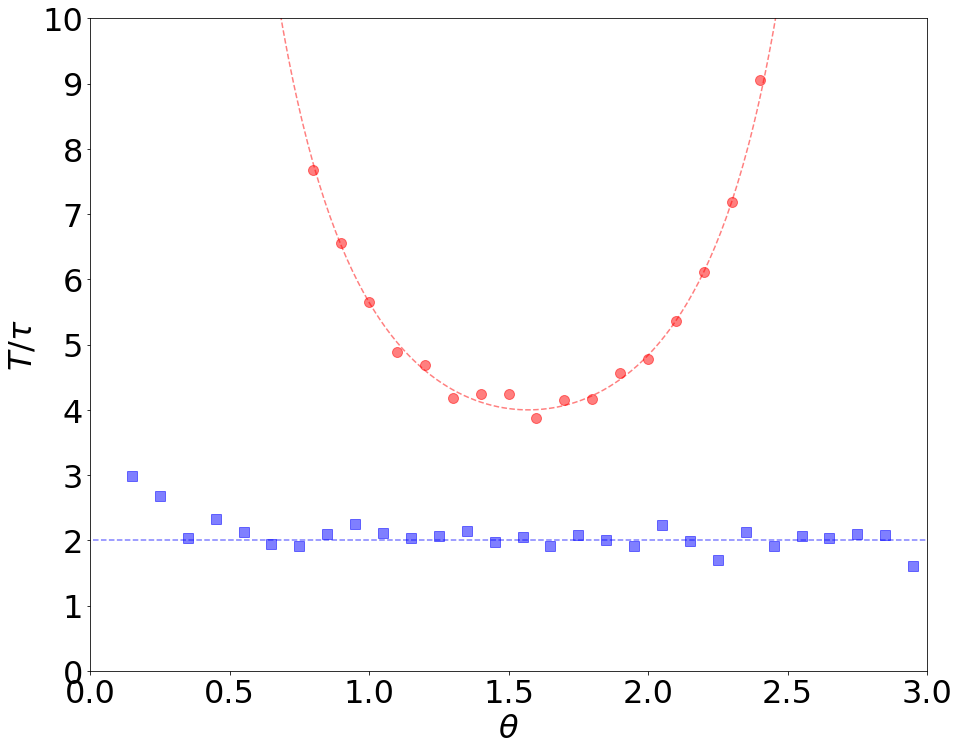

In [5]:
x = np.arange(0.01, np.pi-0.01, 0.01)

fig = plt.figure(figsize = (15, 12))
plt.plot(x, 2*np.ones(len(x)),'b--', alpha=0.5)
plt.plot(theta_list_star, mean_Tp, 'bs', markersize=10, alpha=0.5)
plt.plot(x, 4./(np.sin(x)**2), 'r--', alpha=0.5)
plt.plot(theta_list_switch, mean_Tm, 'ro', markersize=10, alpha=0.5)
plt.ylim([0., 10.])
plt.xlim([0., 3.])
plt.tick_params(axis = 'x', labelsize = 32)
plt.tick_params(axis = 'y', labelsize = 32)
plt.locator_params(axis = 'y', nbins=10)
plt.xlabel(r'$\theta$', fontsize = 32)
plt.ylabel(r'$T/\tau$', fontsize = 32)

## The Qutrit

A spin-1 system is simulated using 2 qubits. We know that the irreducible representations of $\frac{1}{2} \otimes \frac{1}{2} = 1 \oplus 0$. The spin-1 subspace is spanned by (using qubit notation) $\left\{ |00\rangle, \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle), |11\rangle \right\}$.

Also, spin operators are given by $S_k^{(s=1)} = S_k^{(s=1/2)} \otimes \mathbb{1} + \mathbb{1} \otimes S_k^{(s=1/2)}$. Thus, the unitary evolution will be given by

$$\exp \left( - i \omega t S_k \right) = \exp \left( - i \frac{\omega t}{2} [\sigma_k \otimes \mathbb{1} + \mathbb{1} \otimes \sigma_k] \right) = \exp \left( - i \frac{\omega t}{2} \sigma_k \otimes \mathbb{1}\right) ~ \exp \left( - i \frac{\omega t}{2} \mathbb{1} \otimes \sigma_k \right).$$

This is easily implemented using single qubit rotations in the $k$ direction with angle $\omega t$. For concreteness, we choose evolution in the $k = x$ direction.

In [2]:
def advance_and_measure(qc, t):
    
    """Advance a time t assuming w=1 and measure"""
    qc.rx(t, 0)
    qc.rx(t, 1)
    
    qc.measure(0, 0)
    qc.measure(1, 1)
    return

def prepare_qutrit_state(qc, state_label):
    
    if state_label == '+':
        # '+' is |00>
        pass

    elif state_label == '0':
        # '0' is |01> + |10>
        qc.h(0)
        # (|0>+|1>)|0>
        qc.cx(0,1)
        # |00>+|11>
        qc.x(1)
        # |01>+|10>

    elif state_label == '-':
        # '-' is |11>
        qc.x(0)
        qc.x(1)
    return


def do_i_stop(out_result, out_target):
    
    if out_target == '+':
        # we stop if we measure |00>

        if '00' in out_result:
            s = 1
            
        else:
            s = 0

    elif out_target == '0':
        # we stop if we measure either |01> or |10>

        if '10' in out_result or '01' in out_result:
            s = 1
        else:
            s = 0

    elif out_target == '-':
        # we stop if we measure |11>

        if '11' in out_result:
            s = 1
        else:
            s = 0
            
    return s

def out_state(out):
    
    if '00' in out:
        label = '+'

    elif '01' in out or '10' in out:
        # We have measured (|01> + |10>)/sqrt(2)
        label = '0'

    elif '11' in out:
        # We have measured |11>
        label= '-'
        
    return label



def qutrit_T(in_state, target_state, ntimes):
    
    tau = 1
    T = []

    for n in range(ntimes):

        t_list = []

        t = np.random.exponential(tau)
        t_list.append(t)

        # Initialize circuit
        qc = QuantumCircuit(2, 2) # 2 qubits and 2 classical bits


        # Prepare initial state
        prepare_qutrit_state(qc, in_state)


        # advance time t and measure out state
        advance_and_measure(qc, t)

        stop = 0

        while stop == 0:

            backend = Aer.get_backend('qasm_simulator')
            out = execute(qc, backend, shots = 1).result().get_counts()
            
            
            # check whether stop should be changed
            stop = do_i_stop(out, target_state)
            
            # get label of measured state
            out_label = out_state(out)

            if stop == 0:

                # Restart cicruit
                qc = QuantumCircuit(2, 2)
                
                # Prepare measured state
                prepare_qutrit_state(qc, out_label)

                t = np.random.exponential(tau)
                t_list.append(t)
                advance_and_measure(qc, t)


        T.append(sum(t_list))

    T = np.array(T)
    print('T'+in_state+target_state+':', round(T.mean(),4))
    
    return T.mean()

In [4]:
qc = QuantumCircuit(2,2)
ntimes = 1000
Tpp = qutrit_T('+','+', ntimes)
T00 = qutrit_T('0','0', ntimes)
Tmm = qutrit_T('-','-', ntimes)
Tpm = qutrit_T('+','-', ntimes)
Tmp = qutrit_T('-','+', ntimes)
Tp0 = qutrit_T('+','0', ntimes)
Tm0 = qutrit_T('-','0', ntimes)
T0p = qutrit_T('0','+', ntimes)
T0m = qutrit_T('0','-', ntimes)

print('---- T(in,out) ----')
print('T++:', round(Tpp, 2), 'Theory:', 3)
print('T00:', round(T00, 2), 'Theory:', 3)
print('T--:', round(Tmm, 2), 'Theory:', 3)
print('T+-:', round(Tpm, 2), 'Theory:', 6)
print('T-+:', round(Tmp, 2), 'Theory:', 6)
print('T+0:', round(Tp0, 2), 'Theory:', 5)
print('T-0:', round(Tm0, 2), 'Theory:', 5)
print('T0+:', round(T0p, 2), 'Theory:', 5.5)
print('T0-:', round(T0m, 2), 'Theory:', 5.5)

T++: 3.1121
T00: 2.7887
T--: 3.1699
T+-: 6.1843
T-+: 6.114
T+0: 4.9366
T-0: 5.3887
T0+: 5.4373
T0-: 5.6197
---- T(in,out) ----
T++: 3.11 Theory: 3
T00: 2.79 Theory: 3
T--: 3.17 Theory: 3
T+-: 6.18 Theory: 6
T-+: 6.11 Theory: 6
T+0: 4.94 Theory: 5
T-0: 5.39 Theory: 5
T0+: 5.44 Theory: 5.5
T0-: 5.62 Theory: 5.5
